## Observations and Insights

250 mice identified with squamous cell carcinoma (SCC) tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. 

-Of the drug regimens used, Capomulin and Ramicane were the treatments seen in mice with the lowest average tumor volume whereas Ketapril and Naftisol regimens had the highest average of tumor volume.

-The distribution of data of the four treatment regmines of Capomulin, Ramicane, Infubinol, and Ceftamin show that Ramicane had the lowest tumor volume data distribution compared to Capomulin, whereas Infubinol had the highest tumor volume data distribution. It should be noted that there was an outlier in the Infubinol treatment where tumor volume was low for one subject.

-The correlation coefficient between both mouse weight and tumor volume is 0.84 indicating that the strength of this correlation is strong. This would mean that mouse weight has an influence on tumor volume.

-Treatment Regimens Capomulin and Ramicane had more opportunities to be used compared to Propovia, this may mean that Capomulin and Ramicane subjects lived longer than Propovia subjects.

Overall, Ramicane is the treatment regimen comparable to Capomulin in reducing the tumor volume of squamous cell carcinoma (SCC) in mice.

## Dependencies and starter code

In [2]:
#Dependencies and Setup
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

#Study data files
mouse_metadata = 'data/Mouse_metadata.csv'
study_results = 'data/Study_results.csv'

#Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

#Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata_df, study_results_df,
                              how='outer', on='Mouse ID')


## Summary statistics

In [3]:
#Summary Statistics Table for Tumor Volume and Treatment Regimen

#Using .apply method for np and sts
#https://stackoverflow.com/questions/29500650/python-how-to-find-average-of-columns-using-dataframes-apply-method

#Mean
ave_drug_group = combined_results_df.groupby('Drug Regimen')
ave_drug_group= ave_drug_group['Tumor Volume (mm3)'].apply(np.mean)
ave_drug_df = pd.DataFrame(ave_drug_group)

#Median
med_drug_group = combined_results_df.groupby('Drug Regimen')
med_drug_group = med_drug_group['Tumor Volume (mm3)'].apply(np.median)

#Mode
mode_drug_group = combined_results_df.groupby('Drug Regimen')
mode_drug_group = mode_drug_group['Tumor Volume (mm3)'].apply(sts.mode)

#Variance
var_drug_group = combined_results_df.groupby('Drug Regimen')
var_drug_group = var_drug_group['Tumor Volume (mm3)'].apply(np.var)

#Standard Deviation
std_drug_group = combined_results_df.groupby('Drug Regimen')
std_drug_group = std_drug_group['Tumor Volume (mm3)'].apply(np.std)

#SEM
sem_drug_group = combined_results_df.groupby('Drug Regimen')
sem_drug_group = sem_drug_group['Tumor Volume (mm3)'].apply(sts.sem)

#Creating and formatting Summary Table for Summary Statistics
combined_summary_df = ave_drug_df.rename(columns = {'Tumor Volume (mm3)': 'Mean'})
combined_summary_df = combined_summary_df.assign(Median = med_drug_group)
combined_summary_df = combined_summary_df.assign(Mode = mode_drug_group)
combined_summary_df = combined_summary_df.assign(Variance = var_drug_group)
combined_summary_df = combined_summary_df.assign(Standard_deviance = std_drug_group).rename(columns = {'Standard_deviance': 'Standard Deviance'})
combined_summary_df = combined_summary_df.assign(sem = sem_drug_group).rename(columns = {'sem': 'Standard of Error'})

combined_summary_df

,Mean,Median,Mode,Variance,Standard Deviance,Standard of Error
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,"([45.0], [25])",24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,"([45.0], [25])",39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,"([45.0], [25])",42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,"([45.0], [25])",68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,"([45.0], [25])",65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,"([45.0], [25])",60.830138,7.799368,0.581331
Propriva,52.322552,50.854632,"([45.0], [26])",42.088020,6.487528,0.512884
Ramicane,40.216745,40.673236,"([45.0], [25])",23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,"([45.0], [24])",59.122106,7.689090,0.573111


## Bar plots

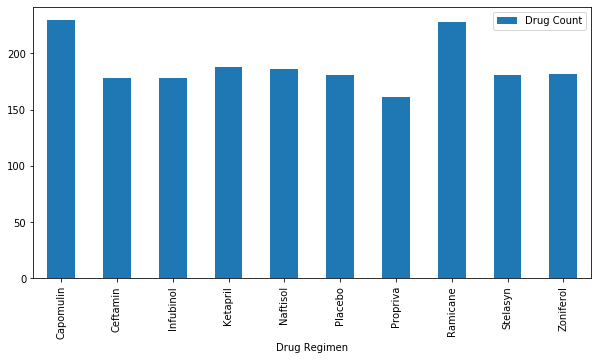

In [4]:
#Create DataFrame for Drug Regimen and Drug Count Bar Chart with pandas

#Bar Plot Treatment Regimen Distribution with Pandas
#Creating Drug Regimen DataFrame
drug_group = combined_results_df.groupby('Drug Regimen')
drug_group = drug_group['Drug Regimen'].count()
drug_df = pd.DataFrame(drug_group)
rename_drug_df = drug_df.rename(columns={'Drug Regimen': 'Drug Count'})

#Creating and formatting Pie plot
drug_barplot = rename_drug_df.plot(kind='bar', figsize=(10,5))

drug_barplot

<function matplotlib.pyplot.show(*args, **kw)>

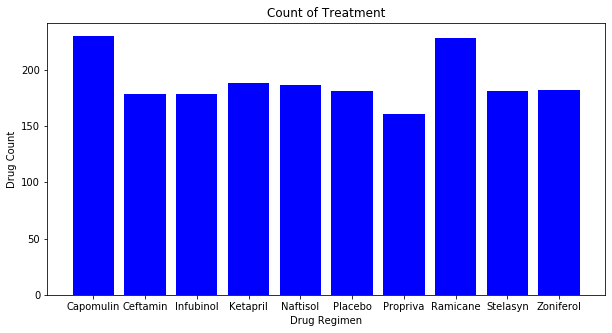

In [5]:
#Bar Plot Treatment Regimen Distribution with Pyplot

#Set x-axis
x_axis = combined_results_df.groupby('Drug Regimen').count()
x_axis = x_axis.index

#Set y-axis
y_axis = combined_results_df.groupby('Drug Regimen')
y_axis = y_axis['Drug Regimen'].count()

#Creating and formatting bar chart
plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color='b', align="center")

#Creating chart title and labels
plt.title("Count of Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Drug Count")

plt.show


## Pie plots

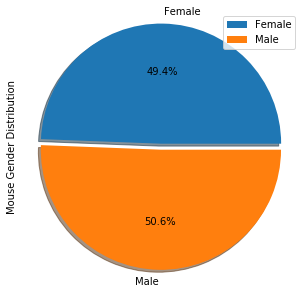

In [6]:
#Generate a pie plot showing the distribution of female versus male mice using pandas

#Pie Plot Gender Distribution with Pandas
#Source: https://datatofish.com/plot-dataframe-pandas/

#Creating Gender DataFrame
gender_group = combined_results_df.groupby('Sex')
gender_count = gender_group['Sex'].count()
gender_df = pd.DataFrame(gender_count)
rename_gender_df = gender_df.rename(columns={'Sex': 'Mouse Gender Distribution'})

#Creating and formatting Pie plot
explode = (0.05, 0)
gender_pieplot = rename_gender_df.plot.pie(subplots=True, explode=explode, figsize=(5,5), autopct='%1.1f%%', shadow=True)
plt.axis("equal")

plt.show()

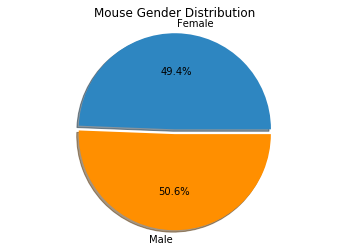

In [7]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot

#Creating filters for Male and Female
piecht_gender_df = combined_results_df['Sex']

#Setting labels variable
male_pie = piecht_gender_df.iloc[0]
female_pie = piecht_gender_df.iloc[11]

#Setting count variable
gender_count_pie = piecht_gender_df.value_counts()

#Creating and formatting Pie plot
gender_pie = [female_pie, male_pie]
count_pie = [gender_count_pie[1], gender_count_pie[0]]
colors_pie = ['#2E86C1', '#FF8F00']
explode = (0.05, 0)
plt.title("Mouse Gender Distribution")
plt.pie(count_pie, labels=gender_pie, explode=explode, colors=colors_pie, autopct='%1.1f%%', shadow=True)
plt.axis("equal")

plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across 
#four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
#Calculate the quartiles and IQR and quantitatively determine if there
#are any potential outliers. 


#Create dataframe to get each unique mouse, max timepoint and max tumor volume
boxplt_df = combined_results_df.groupby(['Mouse ID']).max()
boxplt_df = boxplt_df.reset_index()
tumor_boxplt_df = boxplt_df[['Mouse ID', 'Timepoint']].merge(combined_results_df, on = ['Mouse ID', 'Timepoint'])

#Filtering data for tumor volume for each treatment regimen (Capomulin, Ramicane, Infubinol, and Ceftamin)
capomulin_tumor = tumor_boxplt_df.loc[tumor_boxplt_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane_tumor = tumor_boxplt_df.loc[tumor_boxplt_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol_tumor = tumor_boxplt_df.loc[tumor_boxplt_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin_tumor = tumor_boxplt_df.loc[tumor_boxplt_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

In [31]:
#Calculate the quartiles and IQR for Capomulin regimen
cap_quartiles = capomulin_tumor.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq

print(f"The lower quartile of tumor volume for Capomulin treatment is: {round(cap_lowerq)}")
print(f"The upper quartile of tumor volume for Capomulin treatment is: {round(cap_upperq)}")
print(f"The interquartile range of of tumor volume for Capomulin treatment is: {round(cap_iqr)}")
print(f"The the median of tumor volume for Capomulin treatment is: {round(cap_quartiles[0.5])} ")

#Determining the possible outliers
cap_lower_bound = cap_lowerq - (1.5 * cap_iqr)
cap_upper_bound = cap_upperq + (1.5 * cap_iqr)
print(f"Tumor volume values below {round(cap_lower_bound)} could be outliers.")
print(f"Tumor volume values above {round(cap_upper_bound)} could be outliers.")


The lower quartile of tumor volume for Capomulin treatment is: 32.0
The upper quartile of tumor volume for Capomulin treatment is: 40.0
The interquartile range of of tumor volume for Capomulin treatment is: 8.0
The the median of tumor volume for Capomulin treatment is: 38.0 
Tumor volume values below 21.0 could be outliers.
Tumor volume values above 52.0 could be outliers.


In [32]:
#Calculate the quartiles and IQR for Ramicane regimen
ram_quartiles = ramicane_tumor.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq

print(f"The lower quartile of tumor volume for Ramicane treatment is: {round(ram_lowerq)}")
print(f"The upper quartile of tumor volume for Ramicane treatment is: {round(ram_upperq)}")
print(f"The interquartile range of of tumor volume for Ramicane treatment is: {round(ram_iqr)}")
print(f"The the median of tumor volume for Ramicane treatment is: {round(ram_quartiles[0.5])} ")

#Determining the possible outliers
ram_lower_bound = ram_lowerq - (1.5 * ram_iqr)
ram_upper_bound = ram_upperq + (1.5 * ram_iqr)
print(f"Tumor volume values below {round(ram_lower_bound)} could be outliers.")
print(f"Tumor volume values above {round(ram_upper_bound)} could be outliers.")


The lower quartile of tumor volume for Ramicane treatment is: 32.0
The upper quartile of tumor volume for Ramicane treatment is: 41.0
The interquartile range of of tumor volume for Ramicane treatment is: 9.0
The the median of tumor volume for Ramicane treatment is: 37.0 
Tumor volume values below 18.0 could be outliers.
Tumor volume values above 54.0 could be outliers.


In [33]:
#Calculate the quartiles and IQR for Infubinol regimen
inf_quartiles = infubinol_tumor.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq

print(f"The lower quartile of tumor volume for Infubinol treatment is: {round(inf_lowerq)}")
print(f"The upper quartile of tumor volume for Infubinol treatment is: {round(inf_upperq)}")
print(f"The interquartile range of of tumor volume for Infubinol treatment is: {round(inf_iqr)}")
print(f"The the median of tumor volume for Infubinol treatment is: {round(inf_quartiles[0.5])} ")

#Determining the possible outliers
inf_lower_bound = inf_lowerq - (1.5 * inf_iqr)
inf_upper_bound = inf_upperq + (1.5 * inf_iqr)
print(f"Tumor volume values below {round(inf_lower_bound)} could be outliers.")
print(f"Tumor volume values above {round(inf_upper_bound)} could be outliers.")


The lower quartile of tumor volume for Infubinol treatment is: 54.0
The upper quartile of tumor volume for Infubinol treatment is: 66.0
The interquartile range of of tumor volume for Infubinol treatment is: 11.0
The the median of tumor volume for Infubinol treatment is: 60.0 
Tumor volume values below 37.0 could be outliers.
Tumor volume values above 83.0 could be outliers.


In [34]:
#Calculate the quartiles and IQR for Ceftamin regimen
cef_quartiles = ceftamin_tumor.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq - cef_lowerq

print(f"The lower quartile of tumor volume for Ceftamin treatment is: {round(cef_lowerq)}")
print(f"The upper quartile of tumor volume for Ceftamin treatment is: {round(cef_upperq)}")
print(f"The interquartile range of of tumor volume for Ceftamin treatment is: {round(cef_iqr)}")
print(f"The the median of tumor volume for Ceftamin treatment is: {round(cef_quartiles[0.5])} ")

#Determining the possible outliers
cef_lower_bound = cef_lowerq - (1.5 * cef_iqr)
cef_upper_bound = cef_upperq + (1.5 * cef_iqr)
print(f"Tumor volume values below {round(cef_lower_bound)} could be outliers.")
print(f"Tumor volume values above {round(cef_upper_bound)} could be outliers.")


The lower quartile of tumor volume for Ceftamin treatment is: 49.0
The upper quartile of tumor volume for Ceftamin treatment is: 64.0
The interquartile range of of tumor volume for Ceftamin treatment is: 16.0
The the median of tumor volume for Ceftamin treatment is: 60.0 
Tumor volume values below 25.0 could be outliers.
Tumor volume values above 88.0 could be outliers.


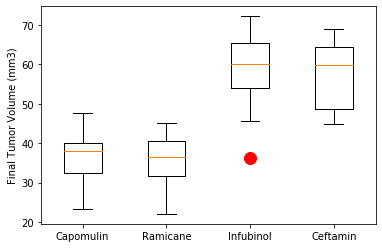

In [35]:
#Creating and formatting box and whisker plot of data on tumor volume for each treatment 
#regimen (Capomulin, Ramicane, Infubinol, and Ceftamin)

outlier_markers = dict(marker = 'o' , markerfacecolor='r', 
                       markersize=12, markeredgecolor='r')
plt.boxplot([capomulin_tumor, ramicane_tumor, infubinol_tumor, ceftamin_tumor], 
            labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], 
            flierprops=outlier_markers)
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and scatter plots

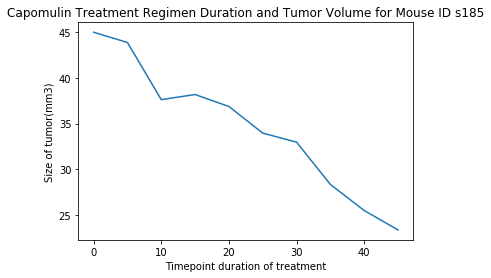

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Creating a dataframe  that filters for Capomulin, time point, and tumor volume for s185 Mouse ID
lineplt_drug_df = combined_results_df[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
lineplt_drug_df2 = lineplt_drug_df.loc[combined_results_df['Drug Regimen'] =='Capomulin',:]
lineplt_drug_df2 = lineplt_drug_df2.loc[combined_results_df['Mouse ID']=='s185',:]

#Plotting with pyplot
#Setting variables for x-axis and y-axis
x_axis= lineplt_drug_df2['Timepoint']
y_axis= lineplt_drug_df2['Tumor Volume (mm3)']

#Formatting title and axis labels
plt.title("Capomulin Treatment Regimen Duration and Tumor Volume for Mouse ID s185")
plt.xlabel("Timepoint duration of treatment")
plt.ylabel("Size of tumor(mm3)")

#Graphing and showing Lineplot
plt.plot(x_axis, y_axis)


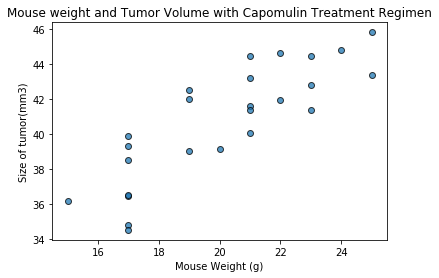

In [37]:
#Filtering for Capomulin, weight, and average tumor volume
scatplt_drug_df = combined_results_df[['Drug Regimen', 'Weight (g)', 'Tumor Volume (mm3)']]
scatplt_drug_df = combined_results_df.loc[combined_results_df['Drug Regimen'] == "Capomulin"]
scatplt_avetumor_df = scatplt_drug_df.groupby(['Mouse ID']).mean()

#Plotting with pyplot
#Setting variables for x-axis and y-axis
x_axis = scatplt_avetumor_df['Weight (g)']
y_axis = scatplt_avetumor_df['Tumor Volume (mm3)']

#Formatting title and axis labels
plt.title("Mouse weight and Tumor Volume with Capomulin Treatment Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Size of tumor(mm3)")
    
#Graphing and showing Lineplot
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)


plt.show()

The correlation coefficient between both mouse weight and tumor volume is 0.84
The strength of this correlation is strong.


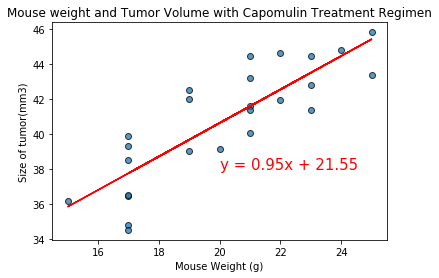

In [25]:
# Calculate the correlation coefficient and linear regression 
#model for mouse weight and average tumor volume for the 
#Capomulin regimen
#Plot the linear regression model on top of the previous scatter plot

#Filtering for Capomulin, weight, and average tumor volume
scatplt_drug_df = combined_results_df[['Drug Regimen', 'Weight (g)','Tumor Volume (mm3)']]
scatplt_drug_df = combined_results_df.loc[combined_results_df['Drug Regimen'] == "Capomulin"]
scatplt_avetumor_df = scatplt_drug_df.groupby(['Mouse ID']).mean()

#Calculating compute the Pearson correlation coefficient between Mouse weight and tumor volume
m_weight = scatplt_avetumor_df['Weight (g)']
t_volume = scatplt_avetumor_df['Tumor Volume (mm3)']
correlation = st.pearsonr(m_weight,t_volume)
print(f'The correlation coefficient between both mouse weight and tumor volume is {round(correlation[0],2)}')
print('The strength of this correlation is strong.')


#Plotting with pyplot
#Setting variables for x-axis and y-axis
x_axis = scatplt_avetumor_df['Weight (g)']
y_axis = scatplt_avetumor_df['Tumor Volume (mm3)']

#Formatting title and axis labels
plt.title("Mouse weight and Tumor Volume with Capomulin Treatment Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Size of tumor(mm3)")
    
#Graphing and showing Lineplot
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)

#Adding the linear regression equation and line to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")

plt.show()